In [93]:
!dir

 Volume in drive F is Work Station
 Volume Serial Number is FC32-A8FF

 Directory of F:\Geeks for Geeks\Machine_Learning\Feature engineering

06/02/2024  09:22 PM    <DIR>          .
05/24/2024  03:51 PM    <DIR>          ..
05/30/2024  10:51 PM    <DIR>          .ipynb_checkpoints
05/30/2024  10:51 PM           285,792 CC_SelectKBest.ipynb
05/22/2024  01:26 AM         1,377,274 global_heat_index.csv
06/02/2024  09:22 PM            60,257 PCA.ipynb
               3 File(s)      1,723,323 bytes
               3 Dir(s)  321,011,642,368 bytes free


In [94]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [95]:
data = pd.read_csv("global_heat_index.csv")

In [96]:
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


In [97]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2011.500000,6.526027,15.720548,11.500000,11.375171,26.953731,979.699263,47.635089,182.306160,2.637895,235.047945
std,0.500014,3.447950,8.796498,6.922384,10.850196,8.417945,6.130488,26.734818,98.695757,1.244842,312.916933
min,2011.000000,1.000000,1.000000,0.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,3.000000,21.611058,974.325027,23.413340,84.141256,1.718903,0.000000
50%,2011.500000,7.000000,16.000000,11.500000,12.000000,27.455196,980.491516,46.529440,221.495407,2.564217,0.000000
75%,2012.000000,10.000000,23.000000,17.250000,22.000000,32.031030,984.943756,69.450031,250.299492,3.412514,489.250000
max,2012.000000,12.000000,31.000000,23.000000,27.000000,52.157927,993.353210,100.000000,359.989960,7.287084,1001.000000


# Cleaning Data

In [98]:
# Cleaning up the data
clean1 = data[data['Hour'] < 6]
clean2 = data[data['Hour'] > 18]

print("Cleaning Data from 12:00 am to 5:59 am")
clean1.head(10)

Cleaning Data from 12:00 am to 5:59 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
24,2011,1,2,0,3,10.231350,984.838196,61.345492,79.954536,2.360912,0
25,2011,1,2,1,3,9.653407,984.457092,63.566375,87.481873,2.193934,0
26,2011,1,2,2,3,9.165823,984.032227,66.509376,90.634872,1.904846,0
27,2011,1,2,3,3,8.773836,984.161560,69.923065,90.924843,1.597840,0


In [99]:
print("Cleaning Data from 18:00 pm to  12.00 am")
clean2.head(10)

Cleaning Data from 18:00 pm to  12.00 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971375,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0
43,2011,1,2,19,5,14.152280,987.563416,54.899280,64.419899,2.399542,0
44,2011,1,2,20,4,13.421063,987.949341,55.893813,73.117203,2.673051,0
45,2011,1,2,21,4,12.687589,987.704529,57.250441,81.467941,2.940782,0
46,2011,1,2,22,4,11.969086,987.413086,58.991594,89.379547,3.099676,0
47,2011,1,2,23,4,11.248868,986.698791,61.125686,96.687325,3.158645,0


In [100]:
data = data.drop(clean1.index,axis=0)
data = data.drop(clean2.index,axis=0)

In [101]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity', 'Wind Direction', 'Wind Speed',
       'Solar Radiation (GHI)'],
      dtype='object')

In [102]:
print("Cleaned Data Description : ")
data.describe()

Cleaned Data Description : 


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000
mean,2011.500000,6.526027,15.720548,12.000000,11.172603,29.843403,979.837013,41.346867,192.621930,2.404642,433.934668
std,0.500026,3.448033,8.796710,3.741855,11.204963,8.272602,6.183468,25.653292,98.401266,1.241931,307.352650
min,2011.000000,1.000000,1.000000,6.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,9.000000,2.000000,24.991642,974.409988,18.638580,98.280884,1.488960,148.000000
50%,2011.500000,7.000000,16.000000,12.000000,11.000000,30.117739,980.606934,39.359365,230.102280,2.246798,446.000000
75%,2012.000000,10.000000,23.000000,15.000000,22.000000,34.920360,985.049332,61.814032,258.325935,3.153406,693.000000
max,2012.000000,12.000000,31.000000,18.000000,27.000000,52.157927,993.353210,100.000000,359.821167,7.287084,1001.000000


In [103]:
print("Cleaned Data : ")
data.head(5)

Cleaned Data : 


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533


# Preparing training and Testing Data 

In [104]:
x = data.iloc[:,4:10].values 
y = data.iloc[:, 10].values 

y = y.reshape(-1,1)

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

In [105]:
print(x_train)

[[ 23.          28.95276574 974.4337769   72.00650744 230.5746765
    3.48527336]
 [  7.          31.45725588 982.7936401   21.82772614  43.92575455
    1.79098237]
 [  5.          45.90862693 977.0198364    9.19367135 256.100769
    2.31313491]
 ...
 [  1.          17.1015701  988.6531982   34.68437781   9.09429932
    1.42941236]
 [ 24.          25.72412262 975.875       95.01792758 211.7336121
    2.95700026]
 [ 25.          28.49819406 974.4430542   83.5370614  239.0466156
    2.56590128]]


In [106]:
print(y_train)

[[178]
 [602]
 [830]
 ...
 [231]
 [162]
 [384]]


# Standardizing DATA

In [109]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(y_train)

In [110]:
print(x_train)

[[ 1.05968611 -0.10596836 -0.86953246  1.20221031  0.39135863  0.85990992]
 [-0.37392147  0.19583916  0.47710333 -0.76144896 -1.50792046 -0.50344039]
 [-0.55312242  1.93732438 -0.45296102 -1.2558607   0.65110389 -0.08327831]
 ...
 [-0.91152432 -1.53411535  1.4209813  -0.25832627 -1.86235409 -0.79438603]
 [ 1.14928659 -0.49504108 -0.63737524  2.10272218  0.19963805  0.43482279]
 [ 1.23888706 -0.16074724 -0.86803804  1.65343846  0.47756634  0.12011598]]


In [111]:
print(y_train)

[[-0.83425739]
 [ 0.55048309]
 [ 1.29510768]
 ...
 [-0.66116483]
 [-0.88651175]
 [-0.16148254]]


In [112]:
x_train.shape

(7592, 6)

# K-Means with 6 clusters

In [113]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 6, random_state=0)
kmeans = kmeans.fit(x_train)

In [114]:
# View Predict Class
labels = kmeans.labels_ 
print("Labels : ", labels)

# View Predict Center 
cluster_centers = kmeans.cluster_centers_
print("\n\n Cluster Centroids : \n", cluster_centers)

Labels :  [2 0 1 ... 3 2 2]


 Cluster Centroids : 
 [[ 0.33015114 -0.23138228  0.71642734  0.32795007 -1.00033373 -0.90491645]
 [-1.02889386  0.99490043 -0.08262824 -1.22044137  0.66222292  0.01753707]
 [ 1.17156267  0.05553773 -0.87887836  1.26473631  0.29644134 -0.11880274]
 [-0.95084667 -1.1733838   1.14941607 -0.32806764 -1.2631691  -0.21145083]
 [-0.36290502 -0.50544892  0.63992321 -0.26248139  0.96017348 -0.54199982]
 [ 0.44115851  1.01717595 -1.09668404 -0.3630175   0.49935768  1.53308979]]


# Applying PCA - Dimensionally Reduction

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2).fit(x_train).transform(x_train)

In [116]:
pca

array([[-1.59837425,  1.04649685],
       [ 1.2422458 , -0.2751212 ],
       [-0.79398024, -2.07624203],
       ...,
       [ 2.88500539,  0.70662158],
       [-1.31961631,  2.03068811],
       [-1.55187659,  1.6325982 ]])

In [117]:
pca.shape[0]

7592

In [118]:
len(labels)

7592

In [119]:
x_train

array([[ 1.05968611, -0.10596836, -0.86953246,  1.20221031,  0.39135863,
         0.85990992],
       [-0.37392147,  0.19583916,  0.47710333, -0.76144896, -1.50792046,
        -0.50344039],
       [-0.55312242,  1.93732438, -0.45296102, -1.2558607 ,  0.65110389,
        -0.08327831],
       ...,
       [-0.91152432, -1.53411535,  1.4209813 , -0.25832627, -1.86235409,
        -0.79438603],
       [ 1.14928659, -0.49504108, -0.63737524,  2.10272218,  0.19963805,
         0.43482279],
       [ 1.23888706, -0.16074724, -0.86803804,  1.65343846,  0.47756634,
         0.12011598]])

# Visualization

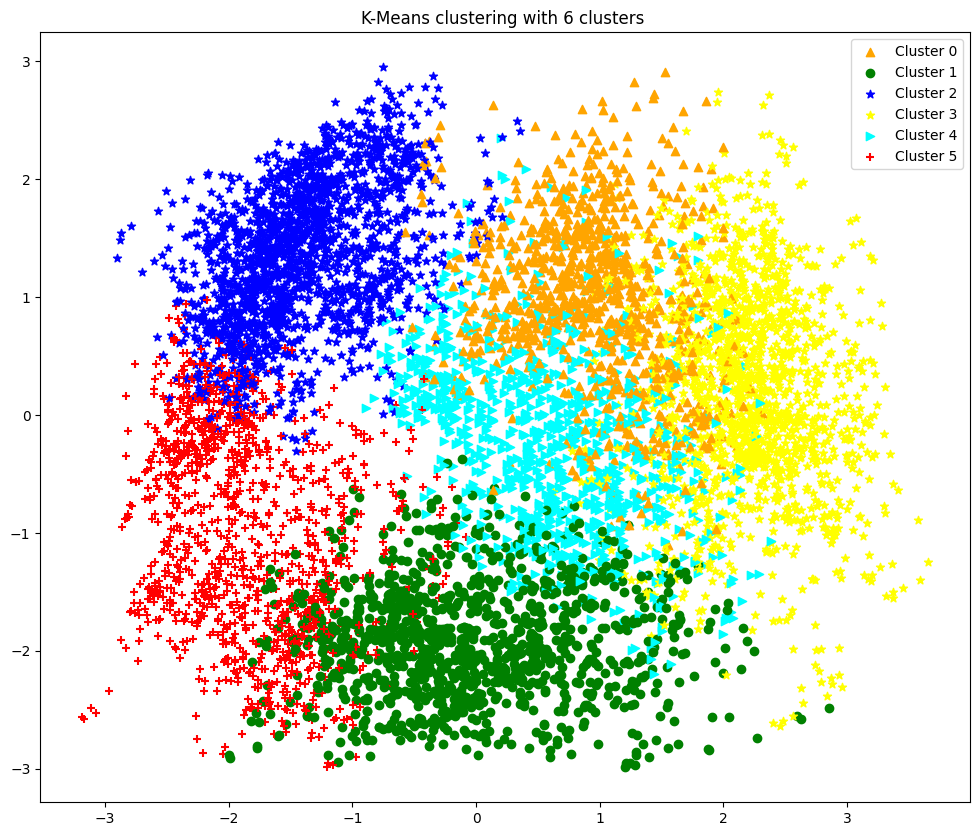

In [124]:
for i in range(0, pca.shape[0]):
    if kmeans.labels_[i] == 0 :
        c1_6 = plt.scatter(pca[i,0], pca[i, 1], c= "orange", marker = "^")
    elif kmeans.labels_[i] == 1 :
        c2_6 = plt.scatter(pca[i,0], pca[i,1], c = "g", marker = "o")
    elif kmeans.labels_[i] == 2 :
        c3_6 = plt.scatter(pca[i,0], pca[i,1], c = "b" , marker = "*")
    elif kmeans.labels_[i] == 3 : 
        c4_6 = plt.scatter(pca[i,0], pca[i,1], c ="yellow" , marker = "*")
    elif kmeans.labels_[i] == 4 :
        c5_6 = plt.scatter(pca[i,0], pca[i,1], c = "cyan" , marker = ">")
    elif kmeans.labels_[i] == 5 :
        c6_6 = plt.scatter(pca[i,0], pca[i,1], c = "red" , marker = "+")

plt.rcParams["figure.figsize"] = (12,10)
plt.legend([c1_6,c2_6,c3_6,c4_6,c5_6,c6_6,],['Cluster 0','Cluster 1',
                                             'Cluster 2','Cluster 3',
                                             'Cluster 4','Cluster 5',])

plt.title("K-Means clustering with 6 clusters " )
plt.show()